In [5]:
import numpy as np
import pandas as pd
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
from sklearn import neighbors
%matplotlib inline

In [2]:
# data import, cleaning, and manipulation
smoothdata = pd.read_csv('C:/Users/jgratsch/Python/Maria_iphone_smoothslow_b2.csv', sep = ',', header = 1)
smoothdata = smoothdata[['timestamp(ms)', 'leftEyeX(3DR)', 'rightEyeX(3DR)']]
smoothdata['LEX'] = smoothdata['leftEyeX(3DR)'] * 1000
smoothdata['REX'] = smoothdata['rightEyeX(3DR)'] * 1000
smoothdata['timestamp(ms)'] = smoothdata['timestamp(ms)'] /1000
calibrationdata = smoothdata[smoothdata['timestamp(ms)'] < 10]
smoothdata = smoothdata[smoothdata['timestamp(ms)'] > 10]
smoothdata = smoothdata.reset_index(drop=True)

In [19]:
# KNN regressor
T = smoothdata['timestamp(ms)']
w = 'uniform'
X = np.array(smoothdata['timestamp(ms)'])
X = X.reshape(-1,1)

# LEX KNN
ylex = np.array(smoothdata['LEX'])
knn_lex = neighbors.KNeighborsRegressor(20, w)
y_lex = knn_lex.fit(X,ylex).predict(X)

#REX KNN 
yrex = np.array(smoothdata['REX'])
knn_rex = neighbors.KNeighborsRegressor(20, w)
y_rex = knn_rex.fit(X,yrex).predict(X)

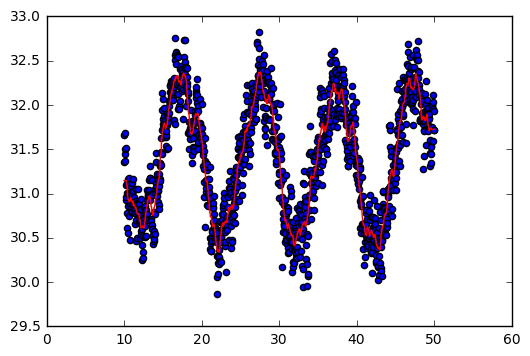

In [20]:
# plot lex knn
plt.scatter(X,ylex)
plt.plot(X, y_lex, color = 'red')

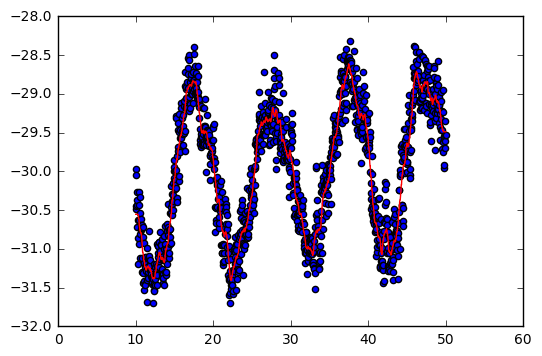

In [21]:
# plot rex knn
plt.scatter(X,yrex)
plt.plot(X, y_rex, color = 'red')

In [22]:
# Now lets build some better visuals

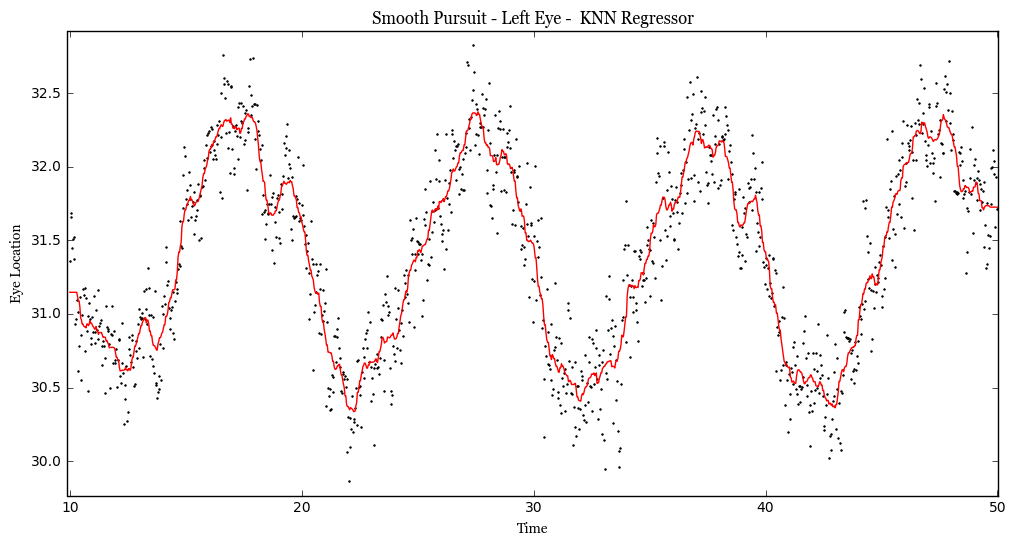

In [24]:
#build visual for left eye
csfont = {'fontname':'Georgia'}
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(111)

ax1.plot(T, ylex, marker = 'o',linestyle = '',  markersize = 1.2, color = 'black' )
ax1.plot(T, y_lex, linestyle = '-', color = 'red')

#true = mpatches.Patch(color = 'black', label = 'Raw Data Output')
#first = mpatches.Patch(color = 'red', label = 'First Pass Estimate')
#opt = mpatches.Patch(color = 'green', label = 'Optimized Fit')

#ax1.legend(handles = [true, first, opt], loc = 4, fontsize = 'small')

plt.xlim(np.min(T)-0.1, np.max(T))
plt.ylim(np.min(ylex)-0.1, np.max(ylex)+0.1)
plt.xlabel('Time', **csfont)
plt.ylabel('Eye Location', **csfont)
plt.title('Smooth Pursuit - Left Eye -  KNN Regressor', **csfont)

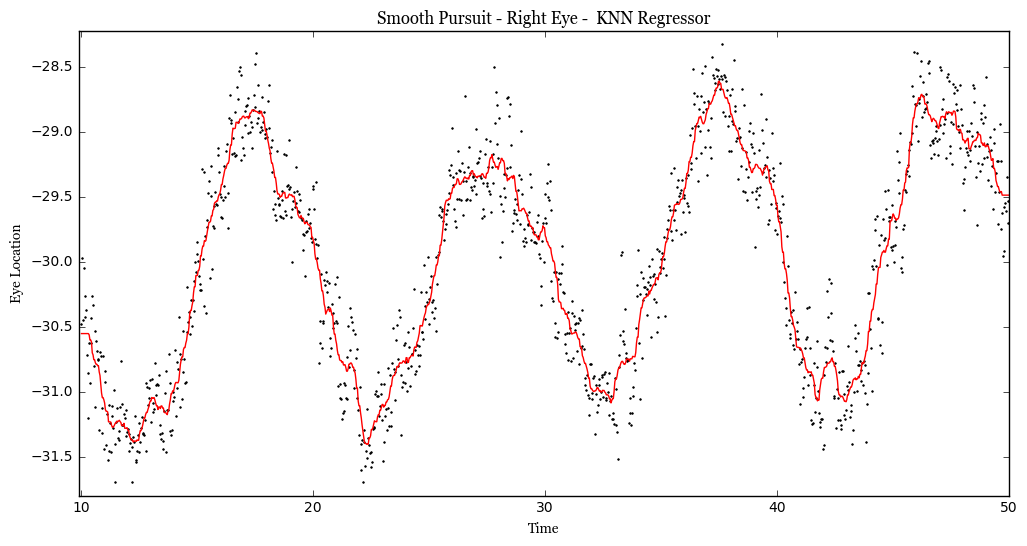

In [27]:
#build visual for right eye
csfont = {'fontname':'Georgia'}
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(111)

ax1.plot(T, yrex, marker = 'o',linestyle = '',  markersize = 1.2, color = 'black' )
ax1.plot(T, y_rex, linestyle = '-', color = 'red')

#true = mpatches.Patch(color = 'black', label = 'Raw Data Output')
#first = mpatches.Patch(color = 'red', label = 'First Pass Estimate')
#opt = mpatches.Patch(color = 'green', label = 'Optimized Fit')

#ax1.legend(handles = [true, first, opt], loc = 4, fontsize = 'small')

plt.xlim(np.min(T)-0.1, np.max(T))
plt.ylim(np.min(yrex)-0.1, np.max(yrex)+0.1)
plt.xlabel('Time', **csfont)
plt.ylabel('Eye Location', **csfont)
plt.title('Smooth Pursuit - Right Eye -  KNN Regressor', **csfont)

In [ ]:
# Non linear least squares optimization does a much better job at getting rid of the noise than kNN